## Taking Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from chembl_webresource_client.new_client import new_client
import requests


Patchinbg for MORDERED to run


## Seaching for molecules that bind to target protien

In [2]:
target=new_client.target
target_query=target.search("ask1")
target_df=pd.DataFrame.from_dict(target_query)      
target_df

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q99683', 'xref_name': None, 'xre...",Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,15.0,False,CHEMBL5285,"[{'accession': 'Q99683', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Mus musculus,Mitogen-activated protein kinase kinase kinase 5,15.0,False,CHEMBL4879411,"[{'accession': 'O35099', 'component_descriptio...",SINGLE PROTEIN,10090


In [3]:
target=target_df.target_chembl_id[0]
target

'CHEMBL5285'

In [4]:
activity=new_client.activity
res=activity.filter(target_chembl_id=target).filter(standard_type="IC50")
res_df=pd.DataFrame.from_dict(res)
res_df=res_df.drop_duplicates(subset="molecule_chembl_id").dropna(subset=["standard_value"])#dropping duplicate id and empty standard values
res_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,2463397,[],CHEMBL965354,Inhibition of ASK1 by fluorescence correlation...,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,9606,None,None,IC50,uM,UO_0000065,None,100.0
2,None,None,2463399,[],CHEMBL965354,Inhibition of ASK1 by fluorescence correlation...,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,9606,None,None,IC50,uM,UO_0000065,None,1.0
3,None,None,2463400,[],CHEMBL965354,Inhibition of ASK1 by fluorescence correlation...,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,9606,None,None,IC50,uM,UO_0000065,None,7.0
6,None,None,5138905,[],CHEMBL1648128,Inhibition of ASK1 assessed as phosphorylated ...,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,9606,None,None,IC50,nM,UO_0000065,None,14.0
7,None,None,5138906,[],CHEMBL1648128,Inhibition of ASK1 assessed as phosphorylated ...,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,9606,None,None,IC50,nM,UO_0000065,None,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,None,None,23372787,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884752,ASK [MAP3K5(M3K5LGA1)] Takeda global kinase panel,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,9606,None,None,pIC50,None,UO_0000065,None,6.0
582,None,None,23373196,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4885043,ASK [MAP3K5(M3K5LGA1)] Takeda global kinase panel,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,9606,None,None,pIC50,None,UO_0000065,None,6.0
583,None,None,23373556,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4885333,ASK [MAP3K5(M3K5LGA1)] Takeda global kinase panel,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,9606,None,None,pIC50,None,UO_0000065,None,6.0
588,None,None,24957433,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5212754,Selectivity interaction (Upstate Kinase Profil...,B,None,None,BAO_0000190,...,Homo sapiens,Mitogen-activated protein kinase kinase kinase 5,9606,None,None,IC50,nM,UO_0000065,None,60.0


In [5]:
res_df.iloc[9]

action_type                                                               None
activity_comment                                                          None
activity_id                                                            5138911
activity_properties                                                         []
assay_chembl_id                                                  CHEMBL1648128
assay_description            Inhibition of ASK1 assessed as phosphorylated ...
assay_type                                                                   B
assay_variant_accession                                                   None
assay_variant_mutation                                                    None
bao_endpoint                                                       BAO_0000190
bao_format                                                         BAO_0000357
bao_label                                                single protein format
canonical_smiles                          COc1ccc(OC

In [6]:
res_df.to_csv("bioactivity_ASK1.csv")

Getting mol list on which we will work:

In [7]:
ID_arr=res_df["molecule_chembl_id"].values
l=len(ID_arr)
ID_arr

array(['CHEMBL471375', 'CHEMBL388978', 'CHEMBL361708', 'CHEMBL1642655',
       'CHEMBL1642656', 'CHEMBL1642657', 'CHEMBL1172777', 'CHEMBL1410917',
       'CHEMBL269881', 'CHEMBL1642669', 'CHEMBL264666', 'CHEMBL1688215',
       'CHEMBL1765740', 'CHEMBL1345690', 'CHEMBL1767077', 'CHEMBL1767078',
       'CHEMBL1529134', 'CHEMBL1767070', 'CHEMBL1767071', 'CHEMBL1767072',
       'CHEMBL1916359', 'CHEMBL1614725', 'CHEMBL1929238', 'CHEMBL103667',
       'CHEMBL1957085', 'CHEMBL2048912', 'CHEMBL2148053', 'CHEMBL2205766',
       'CHEMBL2205636', 'CHEMBL2205635', 'CHEMBL2205634', 'CHEMBL2205633',
       'CHEMBL2205632', 'CHEMBL2205631', 'CHEMBL2205630', 'CHEMBL2205629',
       'CHEMBL2205628', 'CHEMBL2205627', 'CHEMBL2205626', 'CHEMBL2205625',
       'CHEMBL2333365', 'CHEMBL2348417', 'CHEMBL274480', 'CHEMBL2348829',
       'CHEMBL2348828', 'CHEMBL2348827', 'CHEMBL2348826', 'CHEMBL1609550',
       'CHEMBL2349219', 'CHEMBL2348825', 'CHEMBL2349218', 'CHEMBL2349217',
       'CHEMBL1916996', 'CHEMBL2

Trying example of SMILE notation extraction

In [8]:
molecule = new_client.molecule
SMILE = molecule.filter(chembl_id='CHEMBL471375').only(['molecule_structures'])[0]["molecule_structures"]["canonical_smiles"]
str(SMILE)


'Cn1cc(/C=C2\\C(=O)Nc3ccccc32)c2ccccc21'

In [9]:
SMILEarr=[]
for chembl_id in ID_arr:
    url = f'https://www.ebi.ac.uk/chembl/api/data/molecule/{chembl_id}.json'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        smiles = data['molecule_structures']['canonical_smiles']
        print(f'ChEMBL ID: {chembl_id}, SMILES: {smiles}')
        SMILEarr.append(smiles)
    else:
        print(f'Error retrieving data for ChEMBL ID: {chembl_id}')

ChEMBL ID: CHEMBL471375, SMILES: Cn1cc(/C=C2\C(=O)Nc3ccccc32)c2ccccc21
ChEMBL ID: CHEMBL388978, SMILES: CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4
ChEMBL ID: CHEMBL361708, SMILES: NC1=NC(=O)/C(=C2\CCNC(=O)c3[nH]c(Br)cc32)N1
ChEMBL ID: CHEMBL1642655, SMILES: CC(C)(C)c1ccc(C(=O)Nc2cn3cc(-n4ccnc4)ccc3n2)cc1
ChEMBL ID: CHEMBL1642656, SMILES: CC(C)(C)c1ccc(C(=O)Nc2cn3c(ccc4ccccc43)n2)cc1
ChEMBL ID: CHEMBL1642657, SMILES: CC(C)(C(=O)O)c1ccc(C(=O)Nc2cn3cc(-c4ccsc4)ccc3n2)cc1
ChEMBL ID: CHEMBL1172777, SMILES: CSc1nc(N)nc2[nH]cnc12
ChEMBL ID: CHEMBL1410917, SMILES: CCCN(CCC)c1[nH]cnc2ncnc1-2
ChEMBL ID: CHEMBL269881, SMILES: Nc1nc(OCC2CCCCC2)c2nc[nH]c2n1
ChEMBL ID: CHEMBL1642669, SMILES: COc1ccc(OC)c(Nc2nc(N)nc3[nH]cnc23)c1
ChEMBL ID: CHEMBL264666, SMILES: c1nc(N2CCCCC2)c2nc[nH]c2n1
ChEMBL ID: CHEMBL1688215, SMILES: Nc1nccc(-c2ccc3c(N)n[nH]c3c2)n1
ChEMBL ID: CHEMBL1765740, SMILES: CNc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2C[C@@H](C(=O)NC3CCCCC3)CC[C@H]2C)n1
ChEMBL ID: 

In [33]:
from rdkit import Chem
from mordred import Calculator, descriptors

calc = Calculator(descriptors, ignore_3D=True)
mols = [Chem.MolFromSmiles(smi) for smi in SMILEarr]
df = calc.pandas(mols)

  6%|▌         | 26/421 [00:02<08:20,  1.27s/it]

c:\Users\ghosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 421/421 [00:13<00:00, 30.65it/s]


In [34]:
df1=df

In [61]:
df=df1
arr=[]
activity=res_df["standard_value"].tolist()
for i in activity:
    i=float(i)
    if i<100:
        arr.append(1)
    elif i>200:
        arr.append(0)
    else:
        arr.append(" ")
df["label"]=arr

In [66]:
import matplotlib.pyplot as plt

C:\Users\ghosh\AppData\Local\Temp\ipykernel_22776\4187363982.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  q=np.array(activity,dtype=np.float)


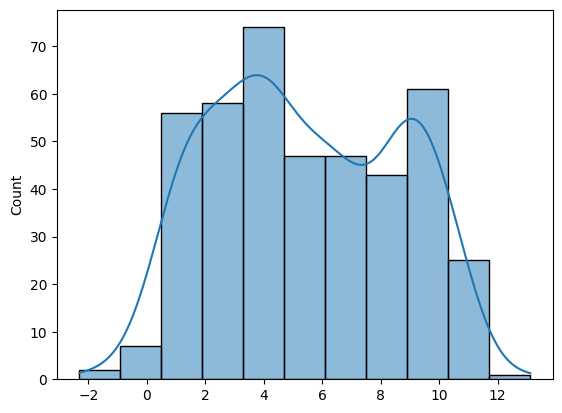

In [68]:
q=np.array(activity,dtype=np.float)
q=np.log(q)
sns.histplot(data=q,kde=True,cumulative=False)
plt.x_label="log of IC50"
plt.show()

In [12]:
df["label"].describe()

count     421
unique      3
top         0
freq      203
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

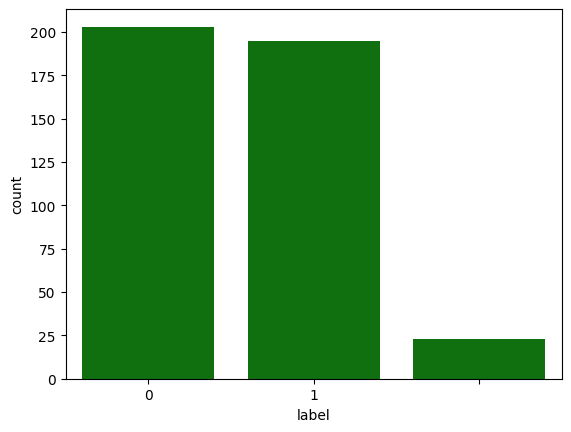

In [62]:
sns.countplot(df,x="label",color="green")

In [14]:
df.to_csv("ASK1datasheet.csv")

In [ ]:
df

## Welcome to model hell

In [72]:
df=pd.read_csv("ASK1datasheet.csv")
df=df[df['label'] != ' ']

In [73]:
def replace_non_numeric_with_0(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return 0
df_cpy=df.applymap(replace_non_numeric_with_0)
df_cpy.fillna(0)

C:\Users\ghosh\AppData\Local\Temp\ipykernel_22776\1415429586.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cpy=df.applymap(replace_non_numeric_with_0)


,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,label
0,0.0,16.946702,13.970524,0.0,0.0,28.121514,2.494273,4.802448,28.121514,1.339120,...,71.746870,274.110613,7.831732,885.0,34.0,118.0,144.0,5.638889,4.500000,0.0
1,1.0,29.156092,21.888974,0.0,1.0,47.715405,2.749242,5.270881,47.715405,1.363297,...,90.994468,466.200491,7.642631,2737.0,85.0,220.0,290.0,9.340278,7.347222,0.0
2,2.0,15.084601,13.504982,0.0,3.0,24.155652,2.486333,4.793549,24.155652,1.271350,...,68.767174,323.001787,11.137993,630.0,32.0,104.0,125.0,6.638889,4.055556,0.0
3,3.0,21.616419,16.544625,0.0,0.0,34.701568,2.440951,4.787564,34.701568,1.285243,...,78.030138,359.174610,7.482804,2104.0,40.0,148.0,174.0,8.451389,5.666667,1.0
4,4.0,20.868872,15.627043,0.0,0.0,33.633832,2.481213,4.869196,33.633832,1.293609,...,75.417265,343.168462,7.301457,1821.0,42.0,144.0,171.0,8.201389,5.444444,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,416.0,24.046279,17.846132,0.0,0.0,40.181263,2.500956,4.912045,40.181263,1.339375,...,80.406440,402.169191,7.734023,2506.0,55.0,166.0,201.0,8.222222,6.472222,0.0
417,417.0,24.781895,18.633638,0.0,0.0,41.302984,2.524477,4.941830,41.302984,1.332354,...,81.916468,480.079703,9.232302,2687.0,59.0,172.0,210.0,9.083333,6.694444,0.0
418,418.0,25.778330,18.874664,0.0,0.0,41.812602,2.501716,4.912834,41.812602,1.306644,...,82.889385,458.162391,7.899352,3072.0,59.0,180.0,217.0,10.034722,6.722222,0.0
419,419.0,21.965399,15.884860,0.0,0.0,35.892651,2.554920,5.006381,35.892651,1.329357,...,77.418461,374.120132,8.313781,1819.0,51.0,154.0,188.0,7.472222,5.694444,1.0


<Axes: xlabel='label', ylabel='count'>

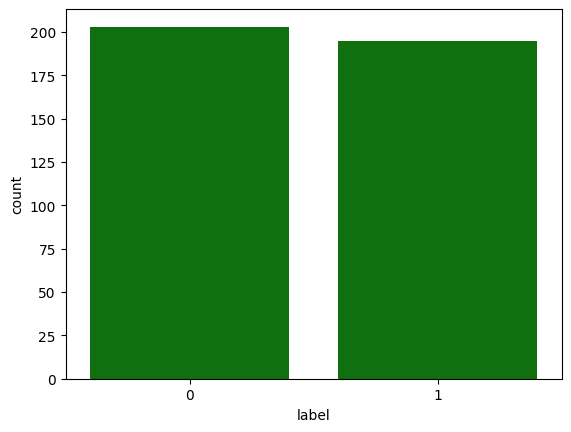

In [23]:
sns.countplot(df,x="label",color="green")

In [74]:
df_cpy.to_csv("checking.csv")
df_cpy_f=df_cpy.iloc[:,:-1]


In [100]:
from sklearn.model_selection import train_test_split
X, X_T, y, y_T = train_test_split(df_cpy_f,df["label"], test_size=0.2, random_state=0)

Predicting with parameter depth=1
Predicting with parameter depth=2
Predicting with parameter depth=3
Predicting with parameter depth=4
Predicting with parameter depth=5
Predicting with parameter depth=6
Predicting with parameter depth=7
Predicting with parameter depth=8
Predicting with parameter depth=9
Predicting with parameter depth=10
Predicting with parameter depth=11
Predicting with parameter depth=12
Predicting with parameter depth=13
Predicting with parameter depth=14
Predicting with parameter depth=15


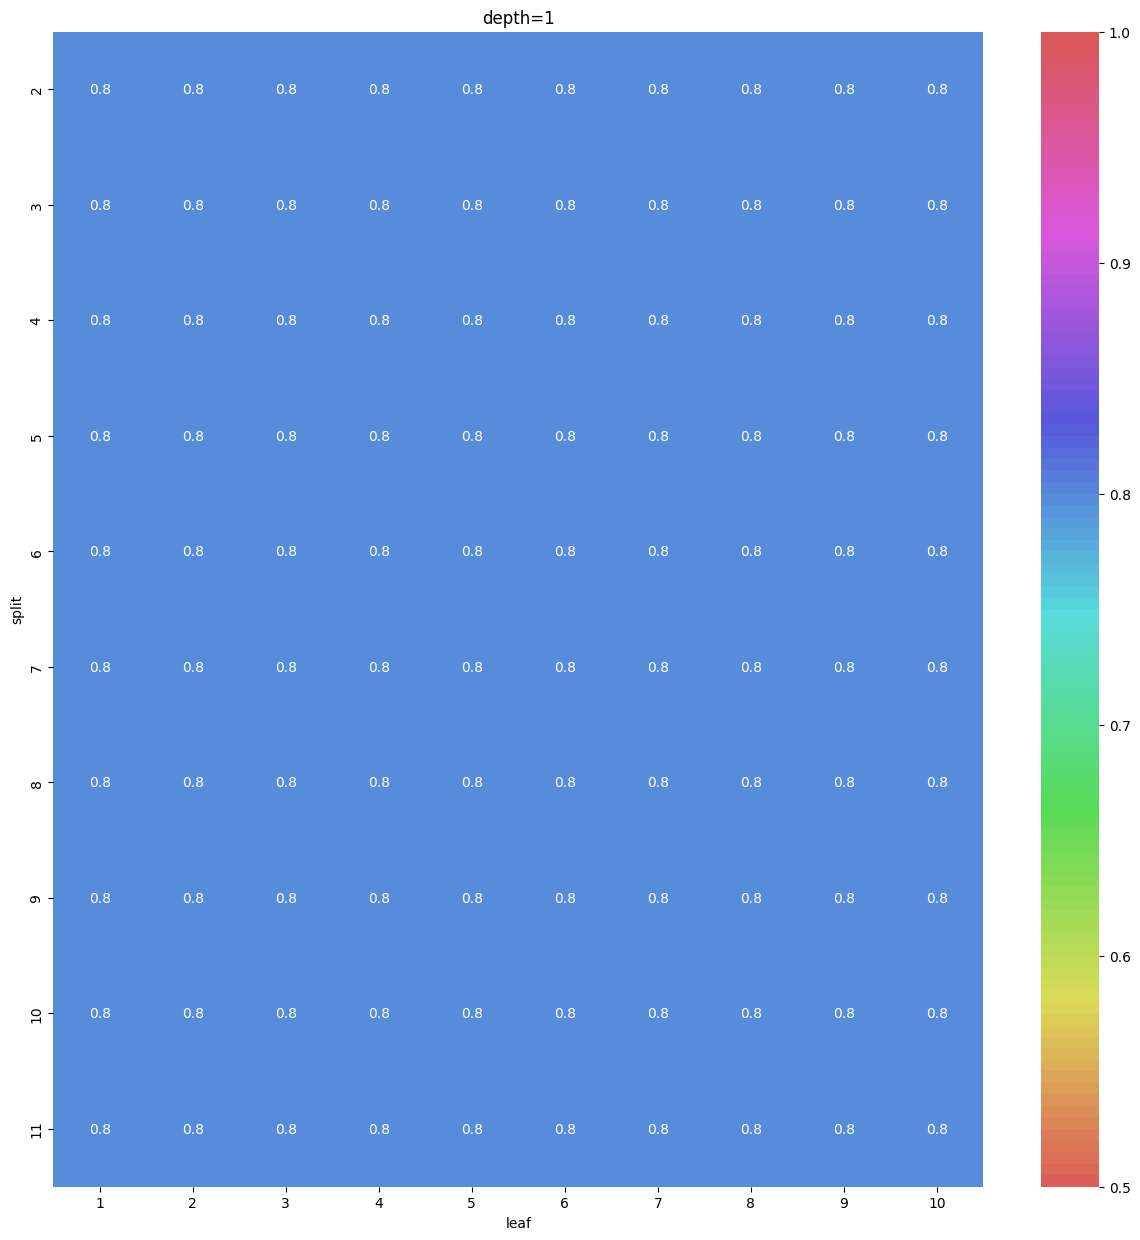

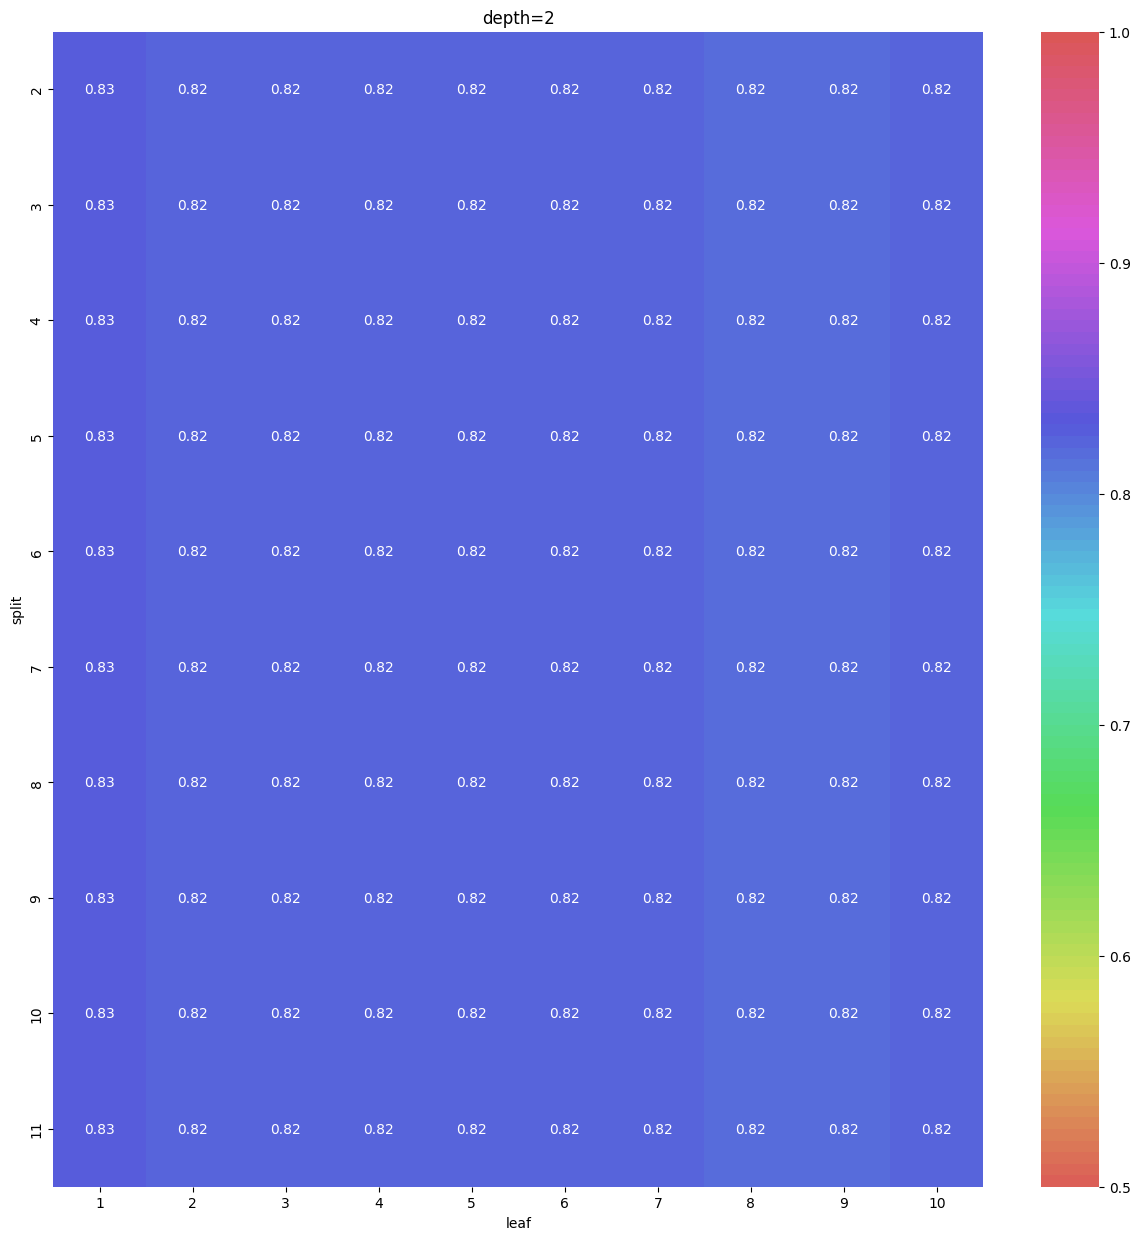

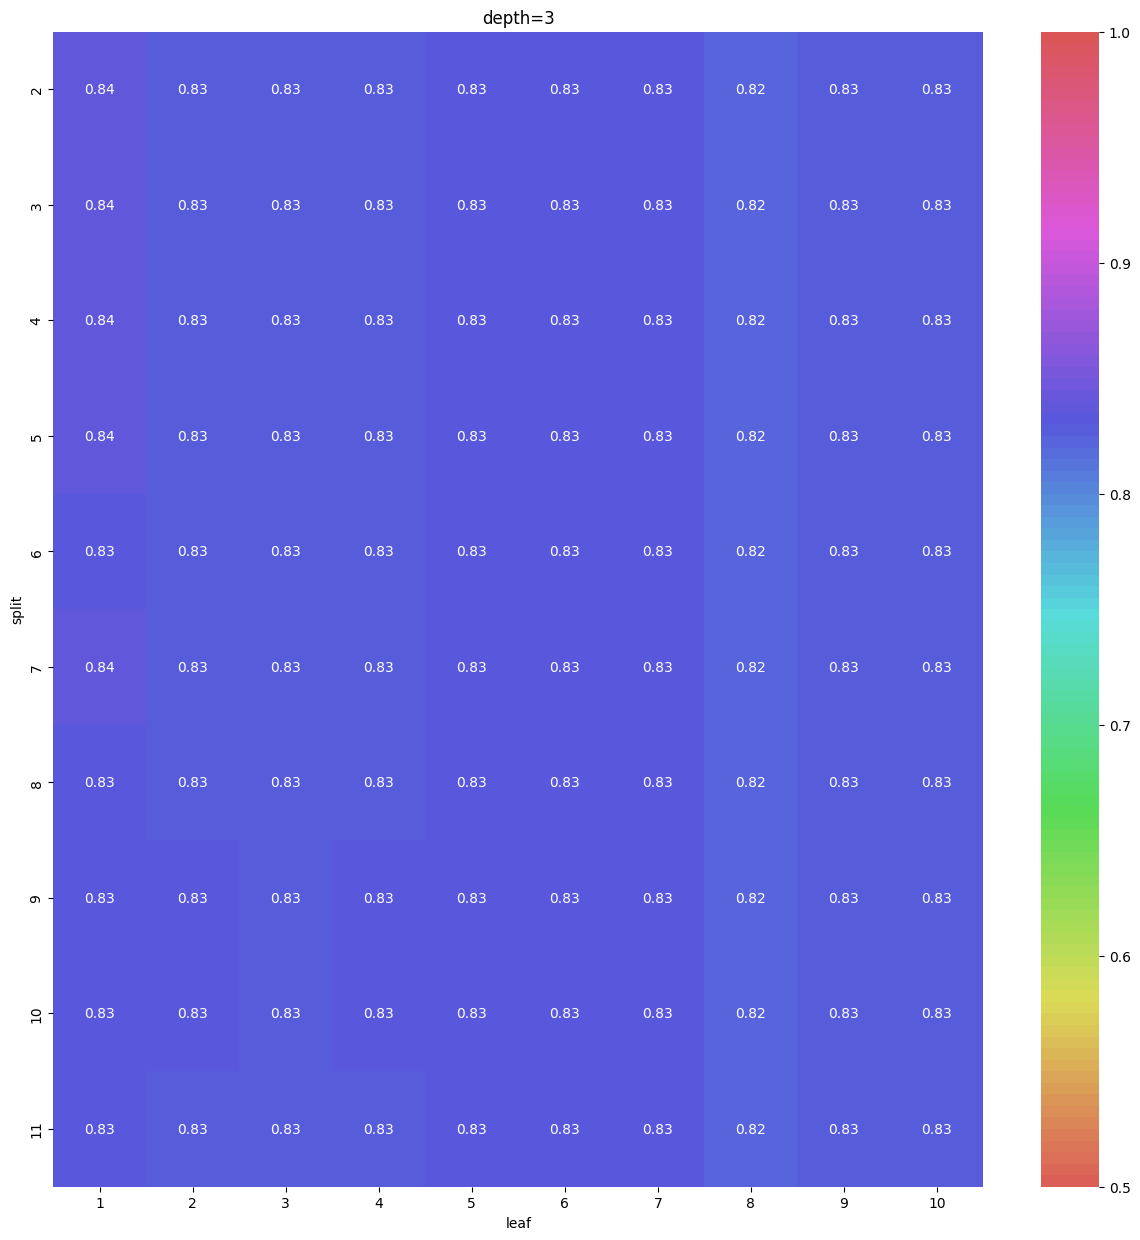

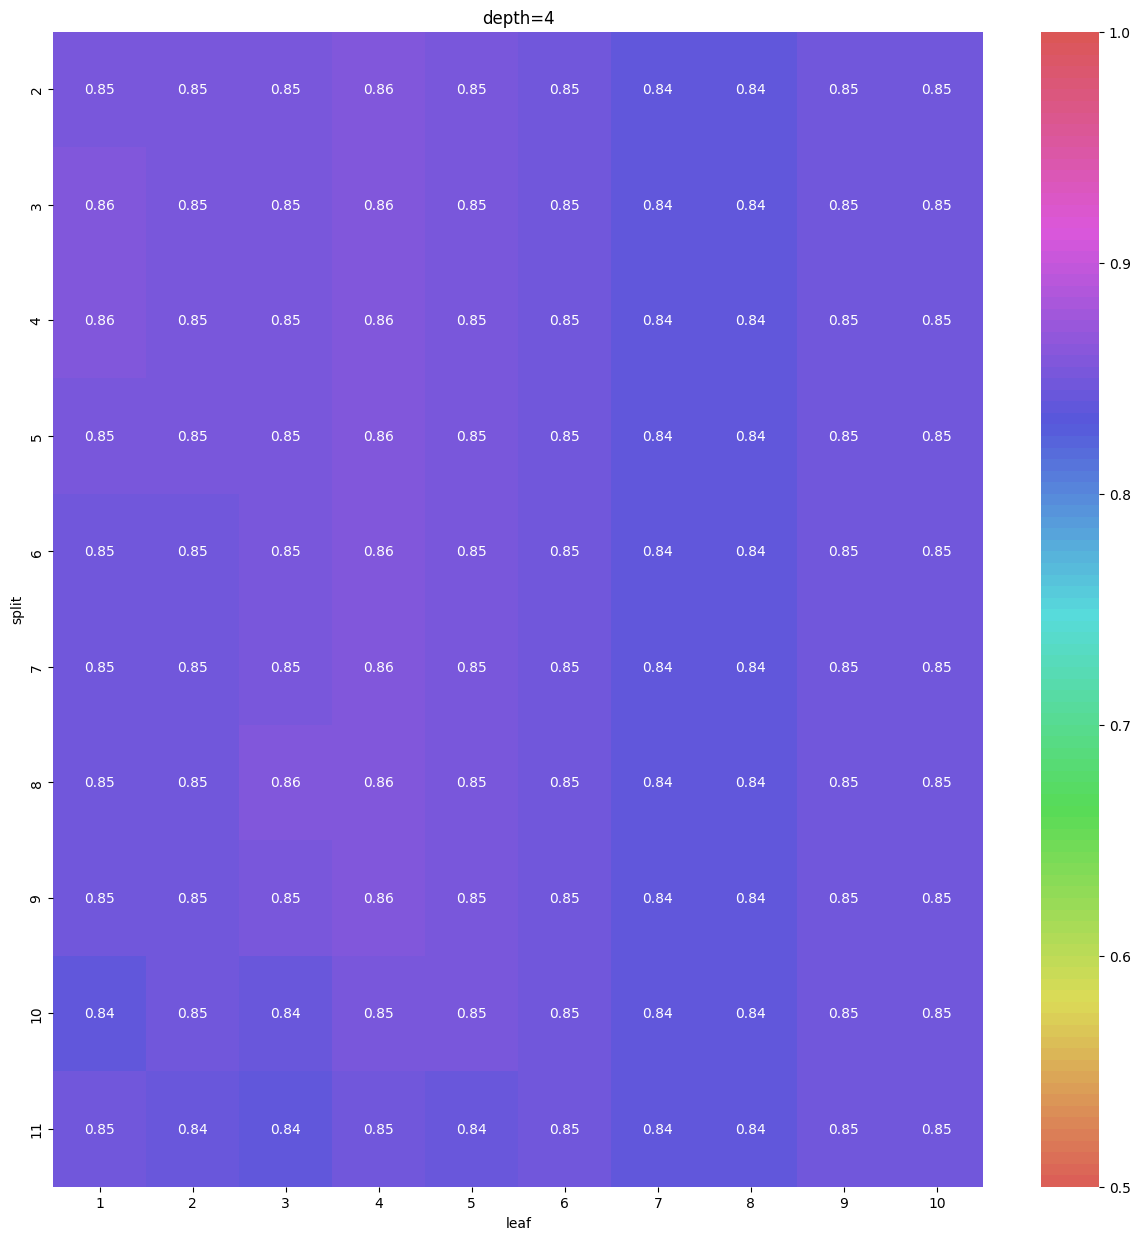

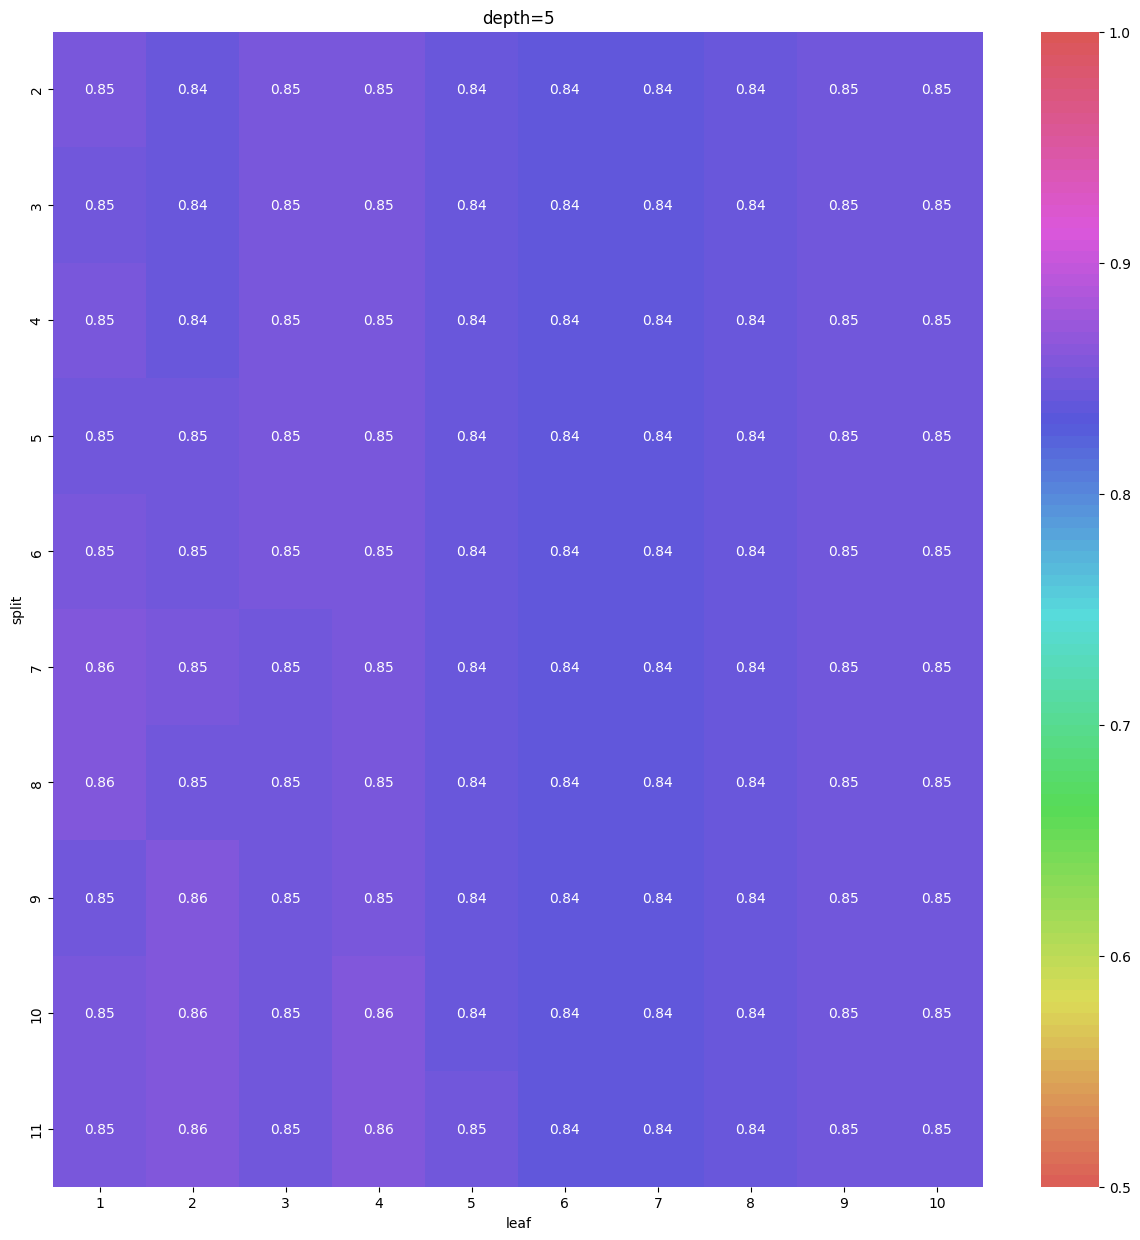

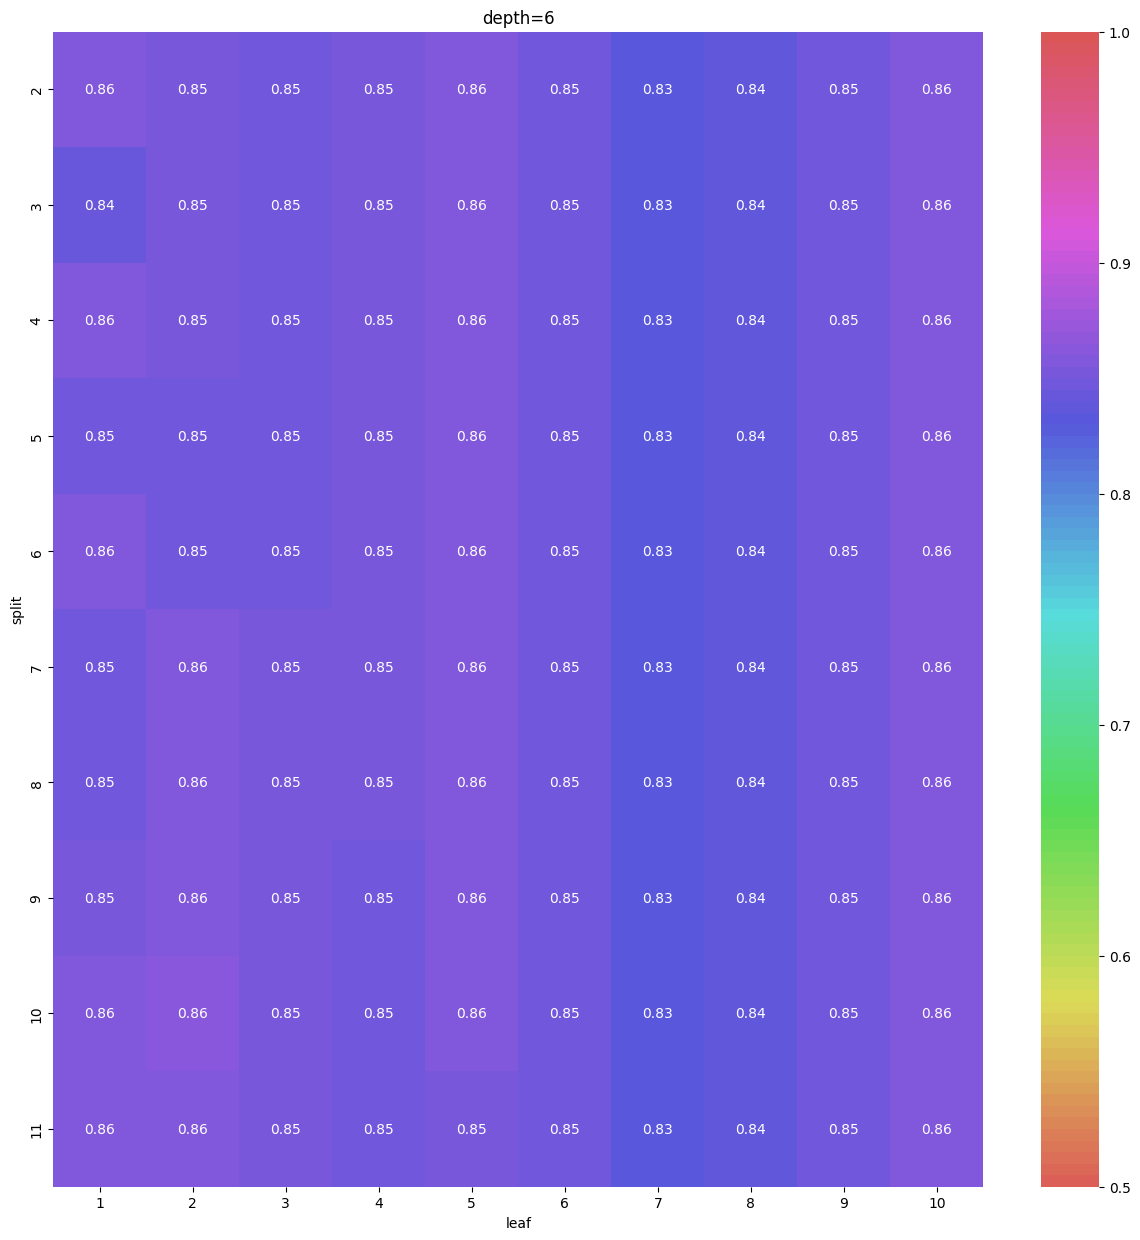

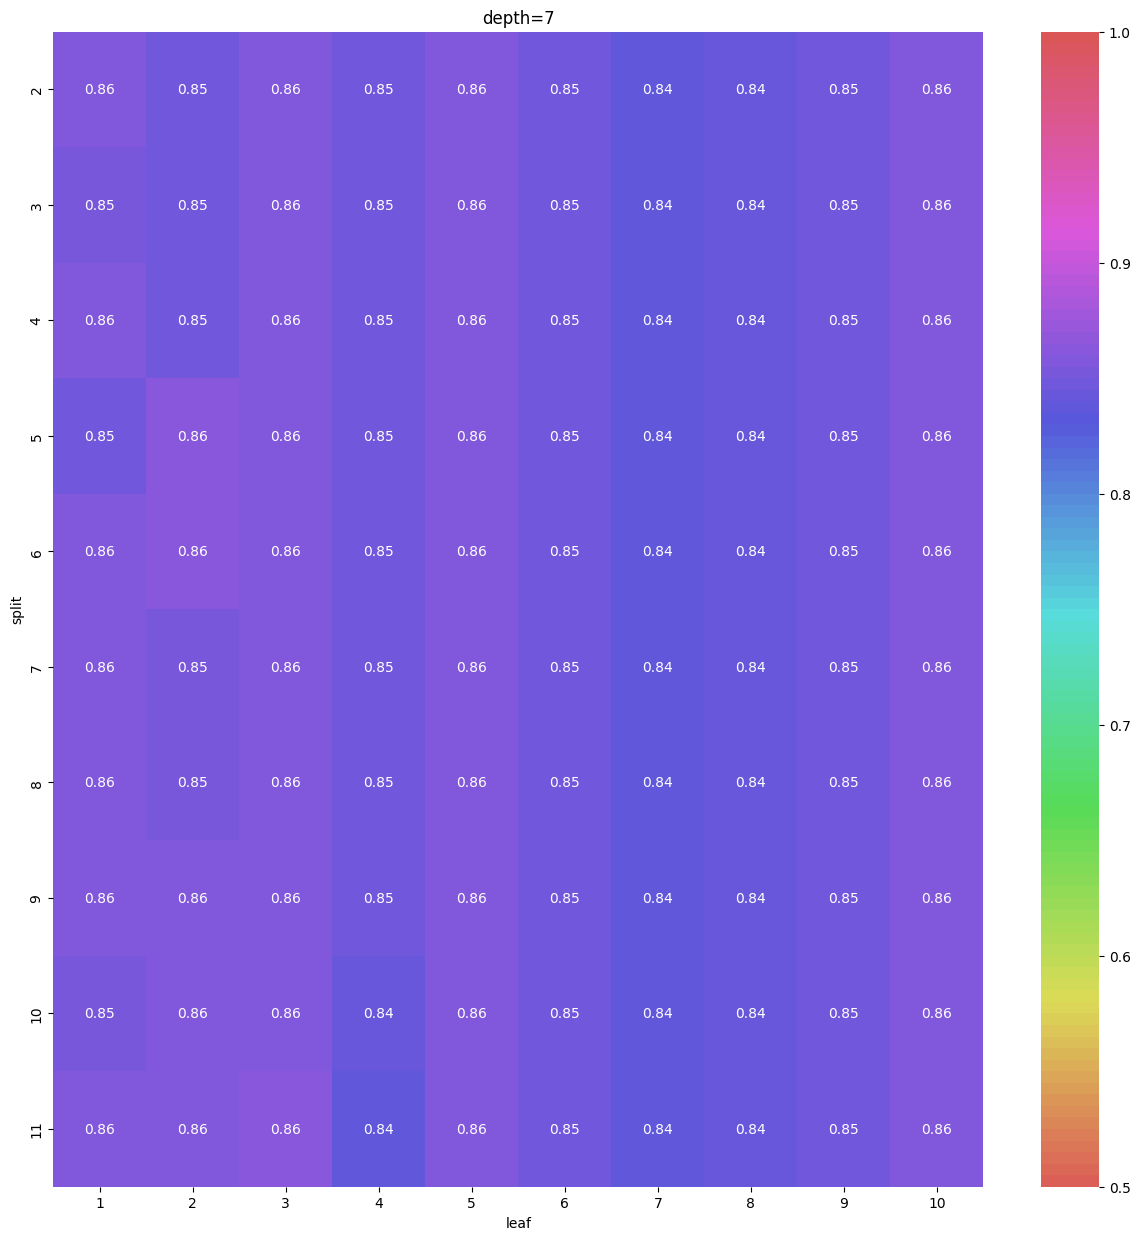

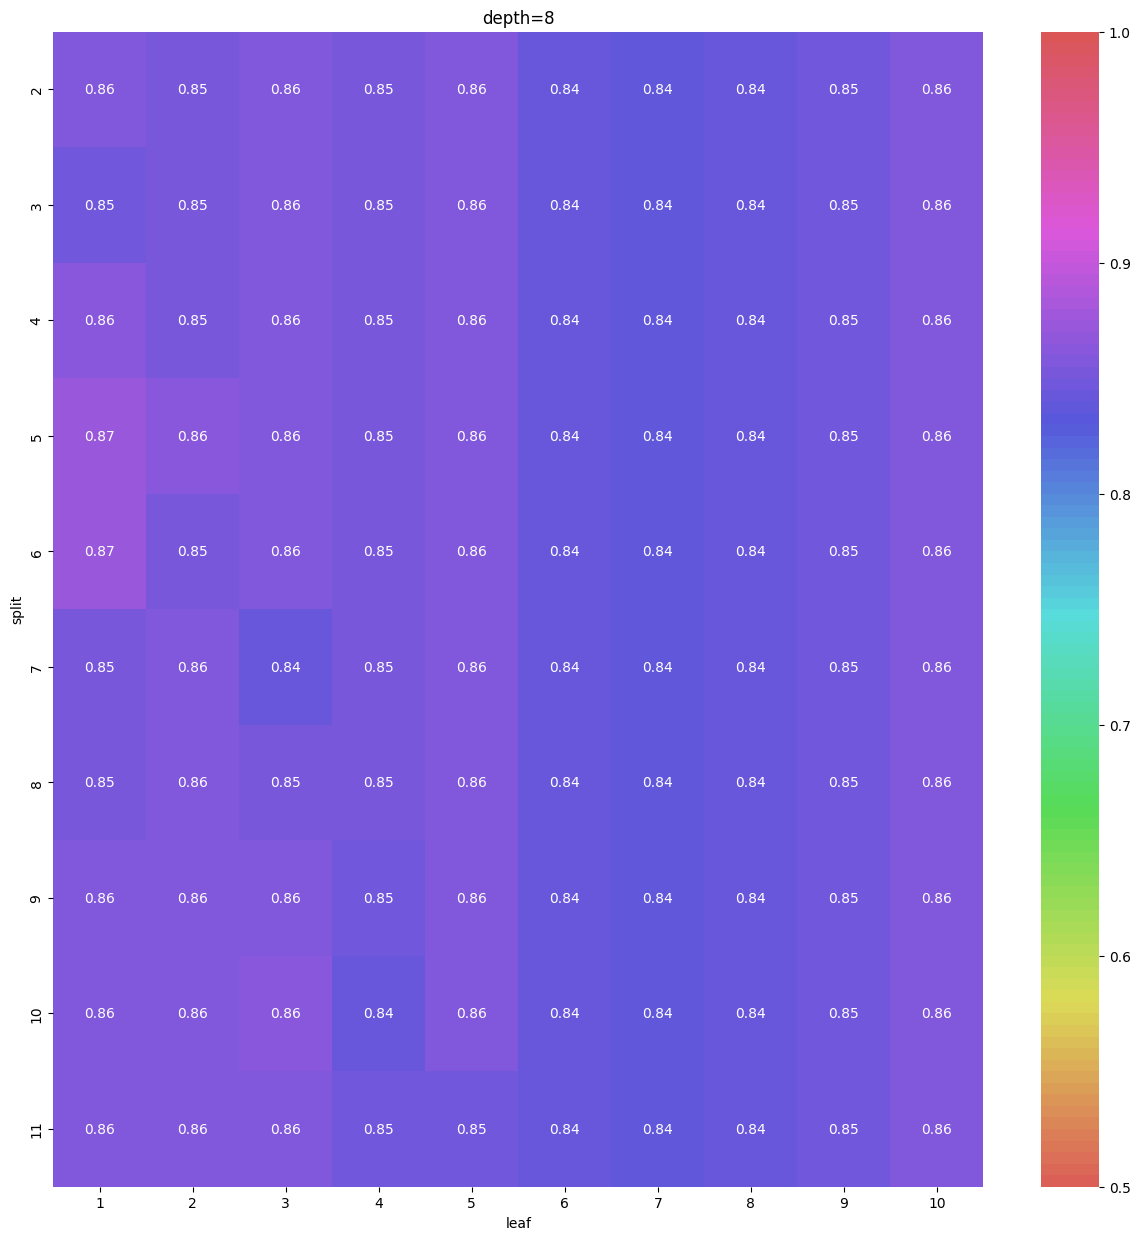

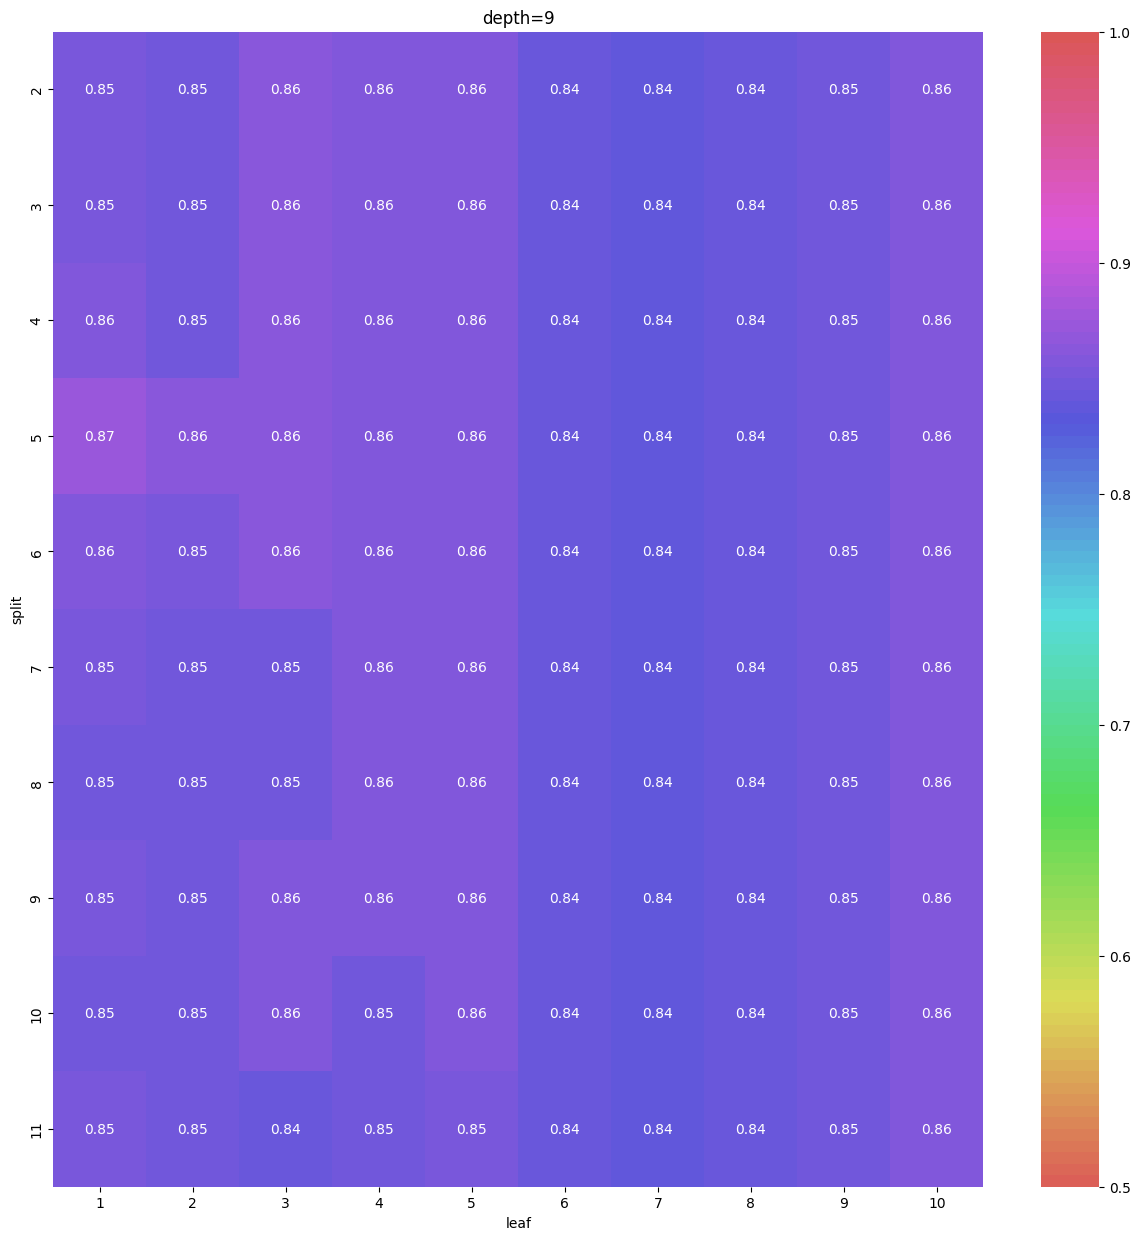

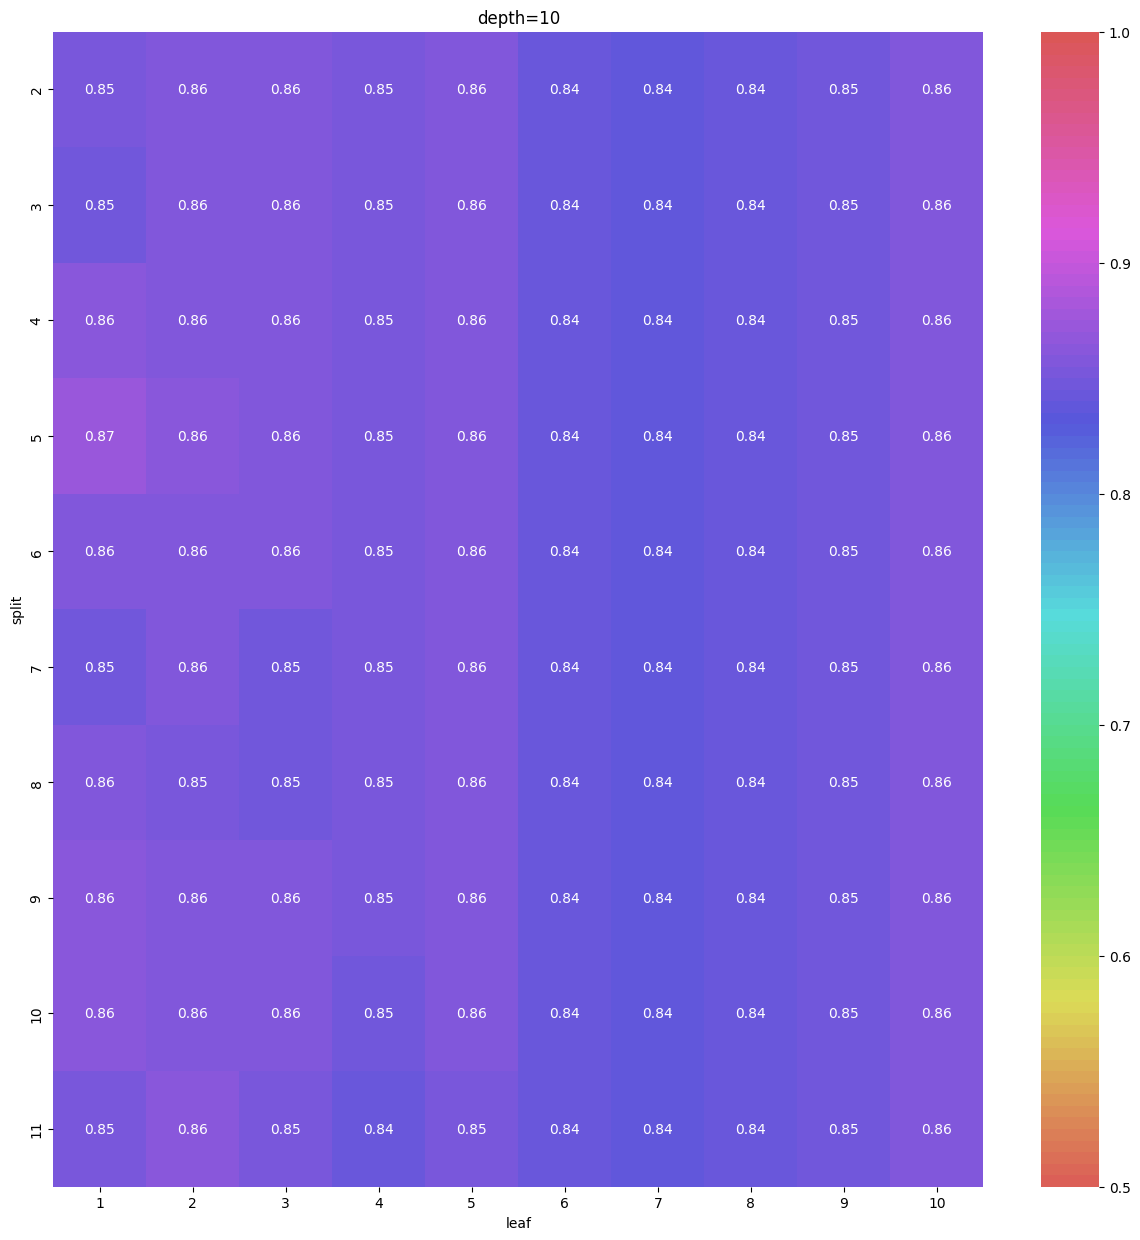

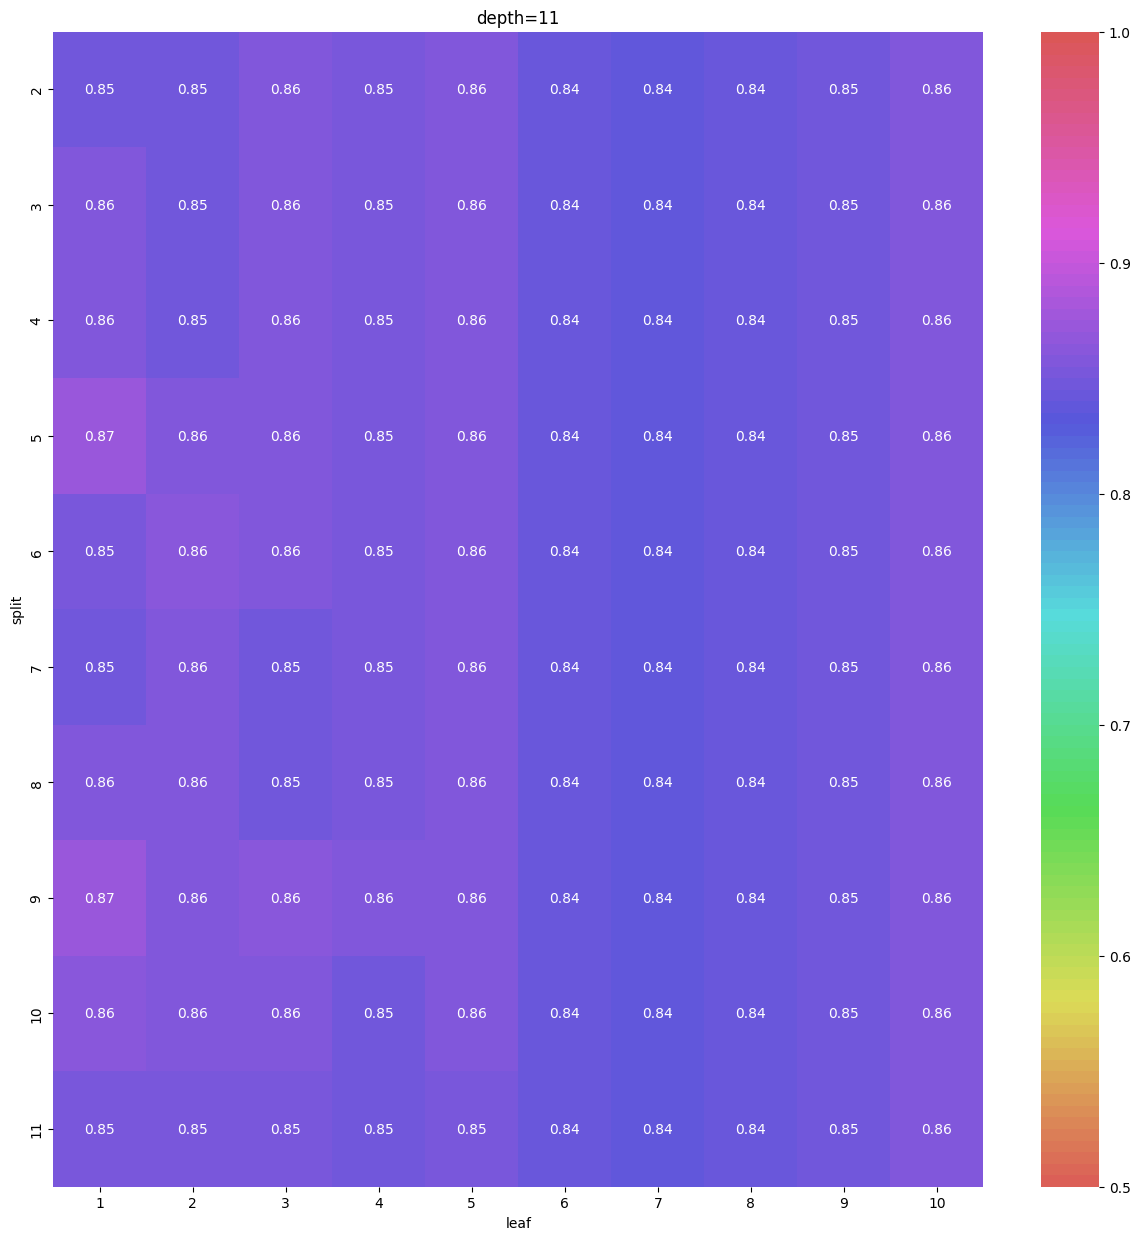

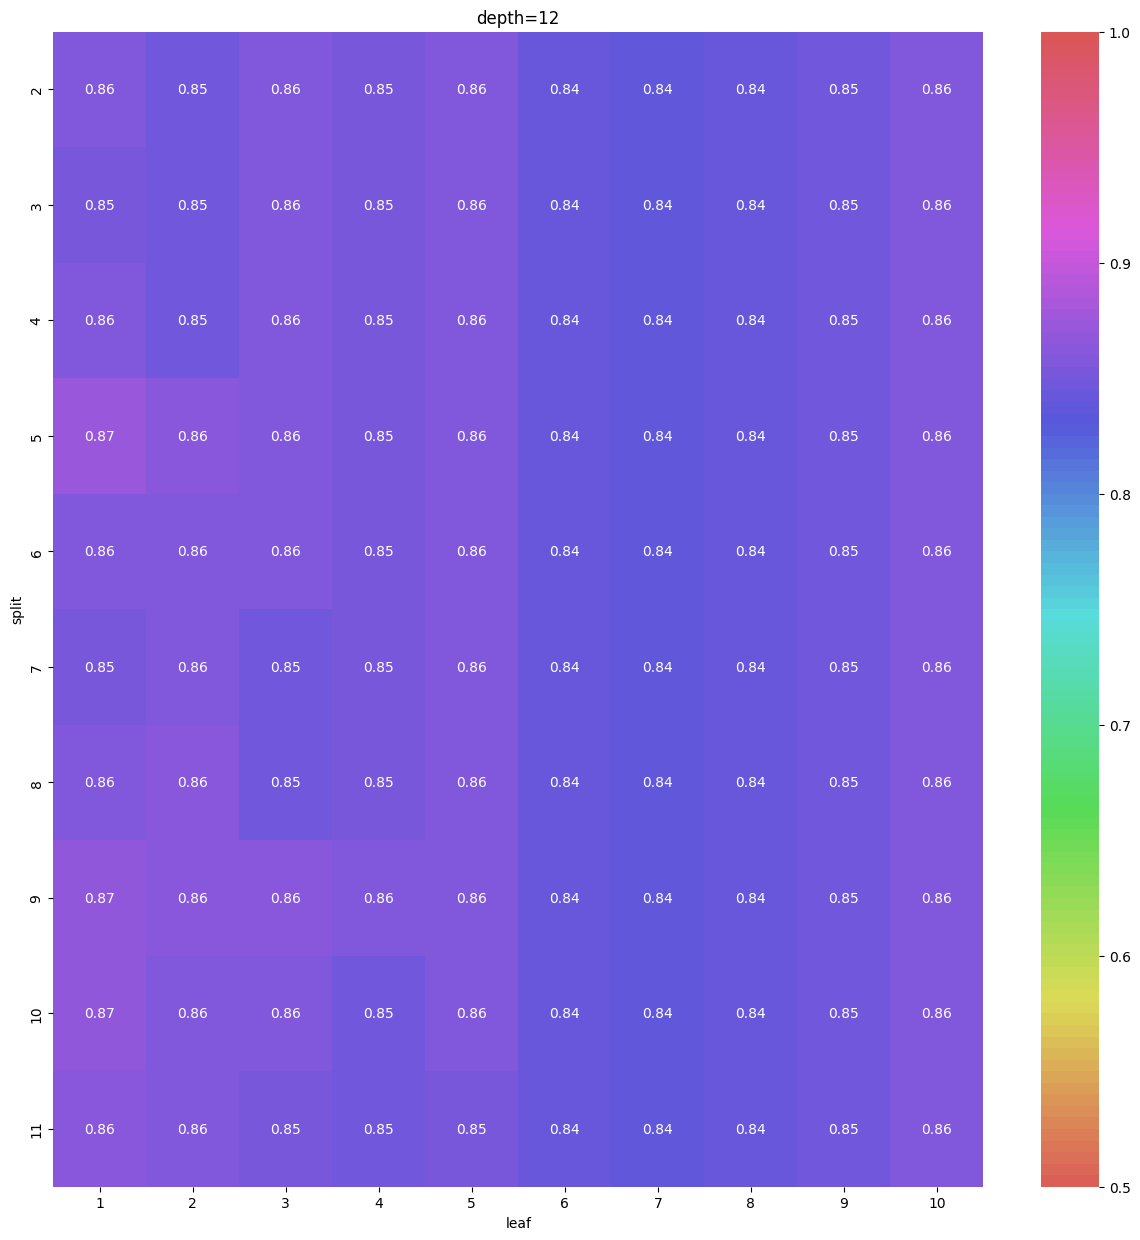

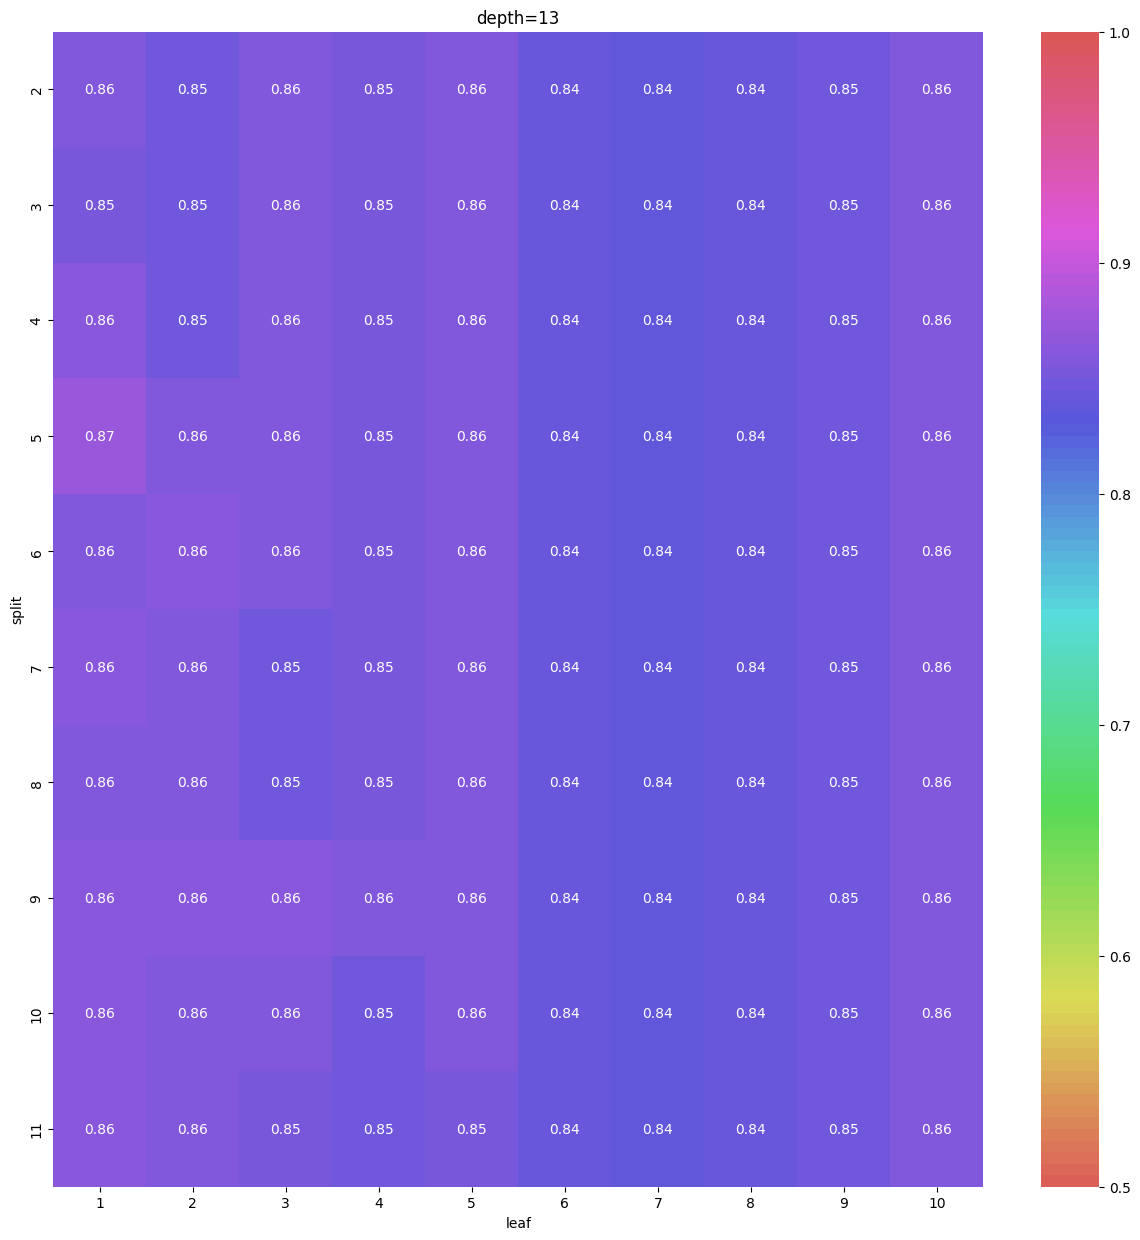

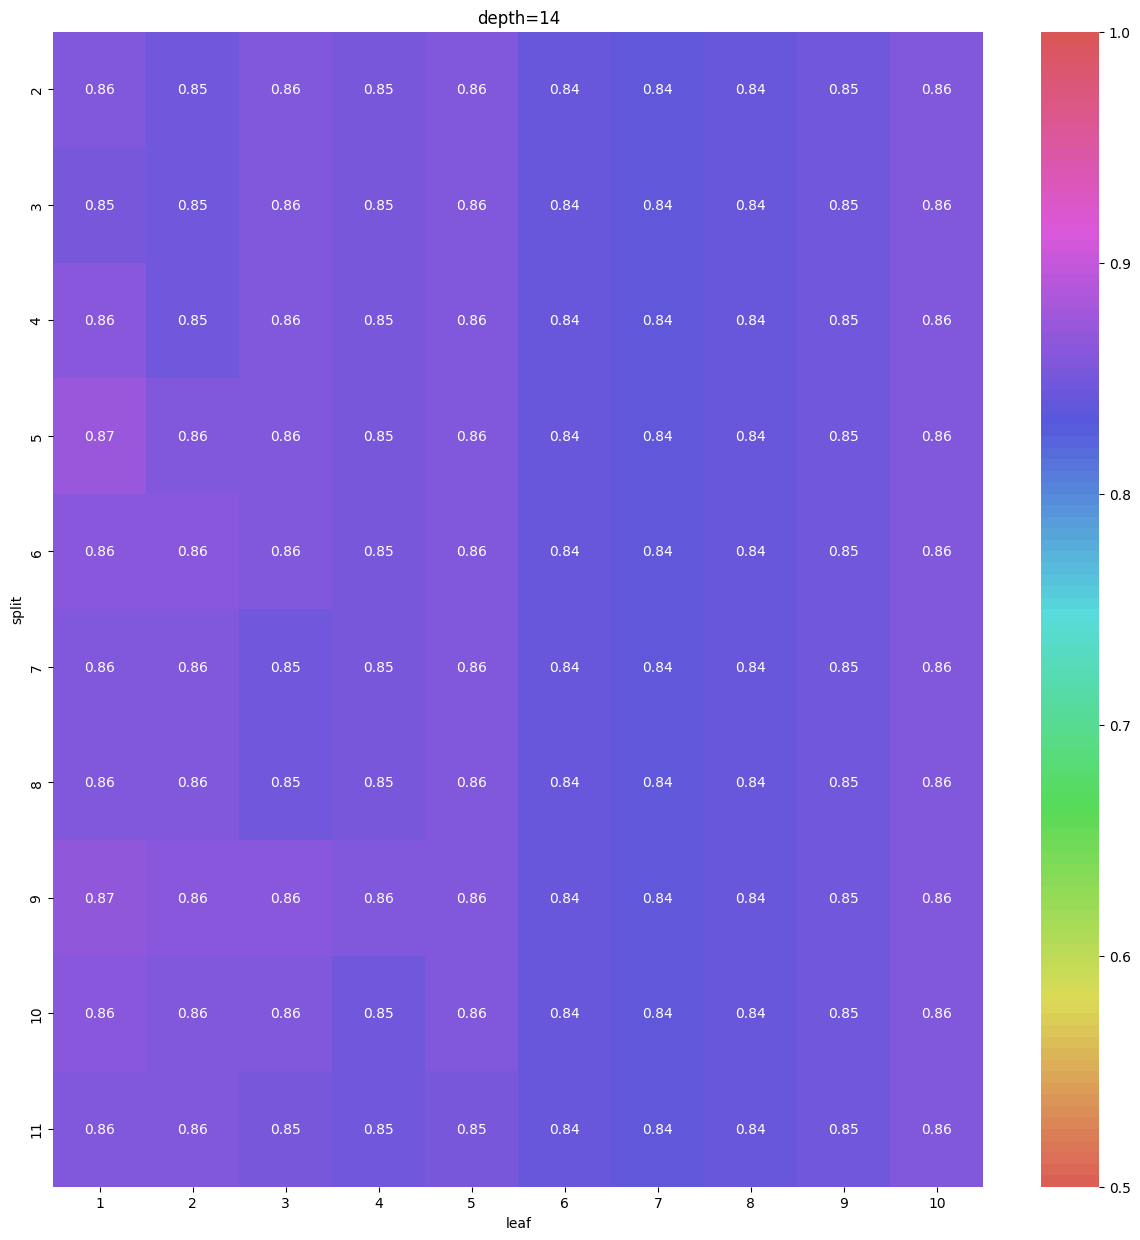

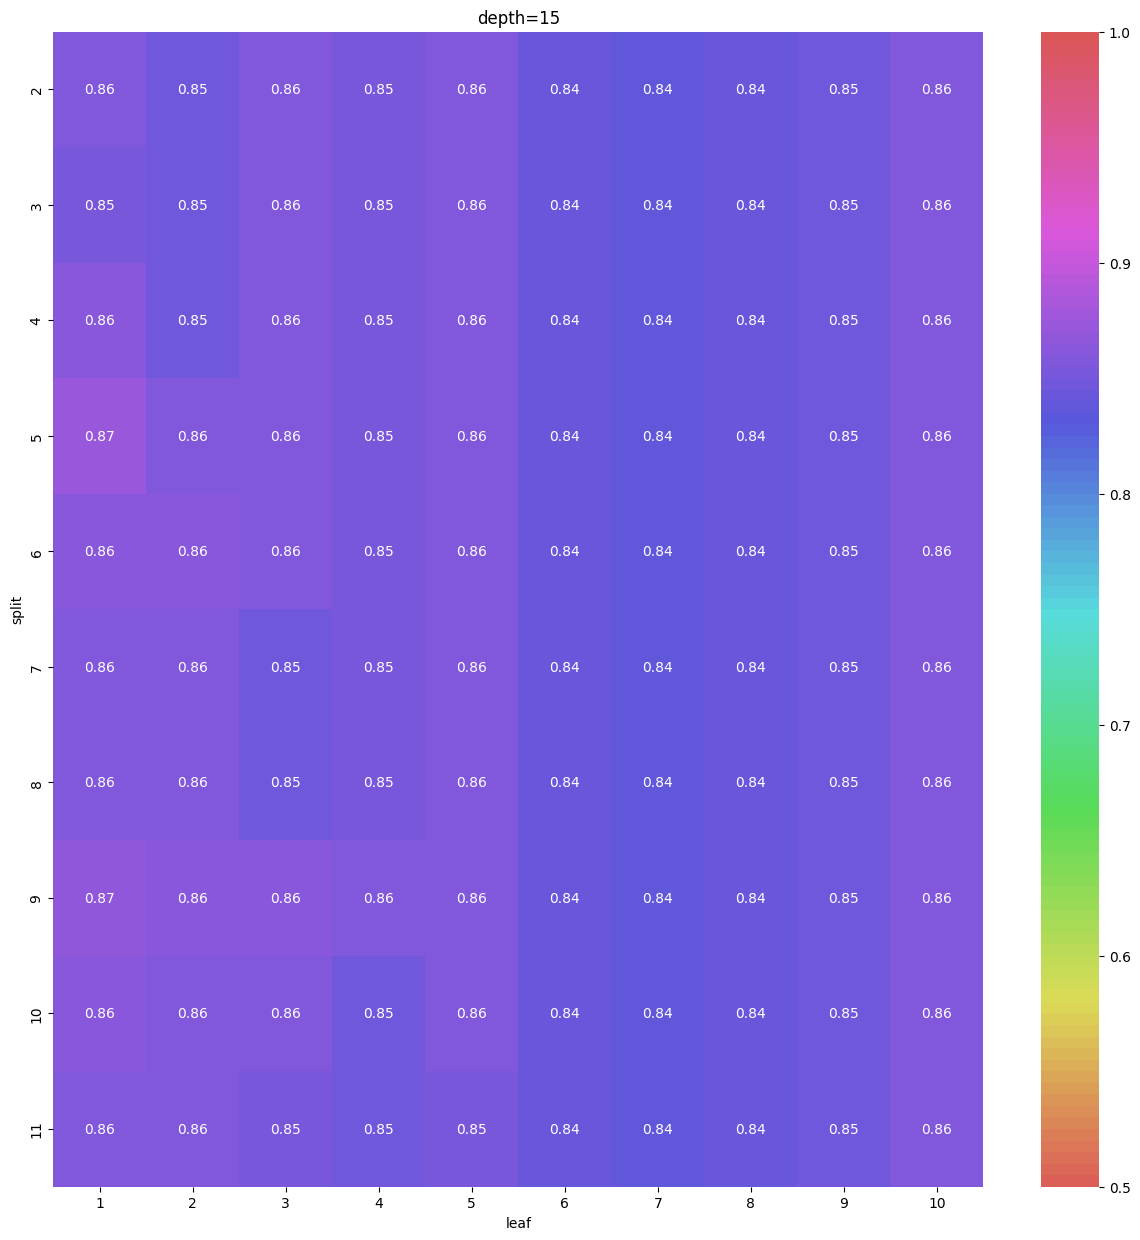

In [76]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
labelX=[]
labelY=[]
i=1
while i<=10:
    labelX.append(i)
    labelY.append(i+1)
    i=i+1
depth=0
while depth<15:
    depth=depth+1
    big_arr=[]
    split=1
    print(f"Predicting with parameter depth={depth}")
    while split<11:
        split=split+1
        arr=[]
        leaf=0
        while leaf<10:
            leaf=leaf+1
            clf = RandomForestClassifier(max_depth=depth, random_state=0, min_samples_split=split, min_samples_leaf=leaf,n_jobs=-1)
            kf = KFold(n_splits=10, shuffle=True, random_state=42)
            
            accuracies = []
            all_true_labels = []
            all_predicted_labels = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                
                # Train the classifier and predict on the test set
                y_pred = clf.fit(X_train, y_train).predict(X_test)
                
                # Calculate accuracy for this fold
                accuracy = accuracy_score(y_test, y_pred)
                accuracies.append(accuracy)
            mean_accuracy = np.mean(accuracies)
            arr.append(mean_accuracy) 
        big_arr.append(arr) 
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(data=big_arr,vmax=1,vmin=0.50,annot=True,xticklabels=labelX,yticklabels=labelY,ax=ax,cmap=sns.color_palette("hls", 100))
    ax.set_xlabel("leaf")
    ax.set_ylabel("split")
    ax.set_title("depth="+str(depth))
    fig.savefig(str(depth))    
      
            


In [108]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


clf = RandomForestClassifier(max_depth=8, random_state=0, min_samples_split=5, min_samples_leaf=1,n_jobs=-1)
clf.fit(X,y)
y_pred = clf.predict(X_T)
accuracy = accuracy_score(y_T, y_pred)
confusion = confusion_matrix(y_T, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.988
Confusion Matrix:
[[42  0]
 [ 1 37]]


In [135]:
i=0
scores=[]
while i<5000:
    X, X_test, y, y_test = train_test_split(df_cpy_f,df["label"], test_size=0.2, random_state=i)
    clf.fit(X,y)
    scores.append(clf.score(X_test,y_test))
    i=i+1


In [136]:
arr=np.array(scores,dtype=float)
mean,std=np.mean(arr),np.std(arr)
print(f"Mean accuracy={mean}\nStandard Deviation={std}")

Mean accuracy=0.8631599999999998
Standard Deviation=0.036901922714135095


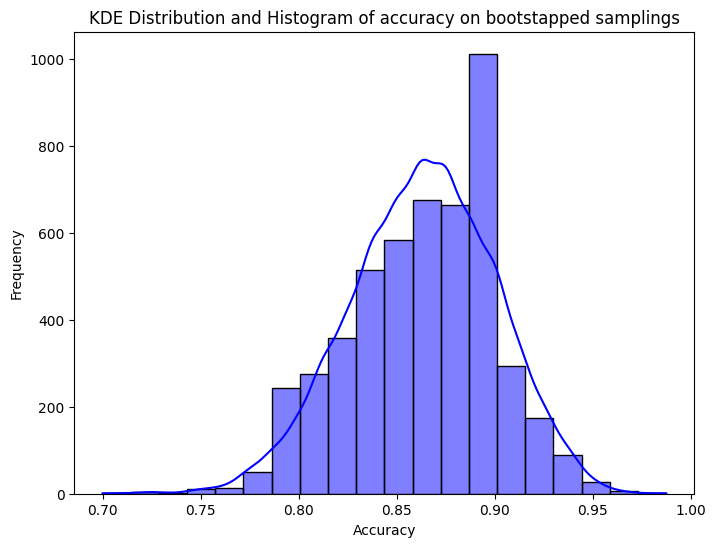

In [138]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot KDE distribution and histogram on the same plot
sns.histplot(scores, kde=True, color='blue', ax=ax, bins=20)

ax.set_title("KDE Distribution and Histogram of accuracy on bootstapped samplings")
ax.set_xlabel("Accuracy")
ax.set_ylabel("Frequency")

plt.show()

In [132]:
from concurrent.futures import ThreadPoolExecutor
def hpam(X,y,X_t,y_T):
    # Define the range of hyperparameters
    max_depth_range = list(range(1, 11))  # Replace with your desired values
    min_samples_split_range = list(range(2, 11))  # Replace with your desired values
    min_samples_leaf_range = list(range(1, 11))  # Replace with your desired values


    # Function to compute accuracy with Random Forest for given hyperparameters
    def compute_accuracy(max_depth, min_samples_split, min_samples_leaf):
        clf = RandomForestClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=0,
            n_jobs=-1
        )
        cv = KFold(n_splits=10, shuffle=True, random_state=42)
        scores = cross_val_score(clf, X, y, cv=cv)
        return max_depth, min_samples_split, min_samples_leaf, scores.mean()

    # Initialize a ThreadPoolExecutor to run computations in parallel
    with ThreadPoolExecutor() as executor:
        results = list(
            executor.map(
                compute_accuracy,
                max_depth_range,
                min_samples_split_range,
                min_samples_leaf_range
            )
        )
    a=0
    b=0
    c=0
    for (i, j, k), accuracy in results:
        if accuracy > best_accuracy:
            (a,b,c) = (i + 1, j + 2, k + 1)
    clf = RandomForestClassifier(
            max_depth=a,
            min_samples_split=b,
            min_samples_leaf=c,
            random_state=0,
            n_jobs=-1
        )
    clf.fit(X,y)
    return(clf.score(X_T,y_T))
i=0
scores=[]
while i<5000:
    X, X_test, y, y_test = train_test_split(df_cpy_f,df["label"], test_size=0.2, random_state=i)
    clf.fit(X,y)
    scores.append(clf.score(X_test,y_test))
    i=i+1


In [130]:
len(scores)

1000

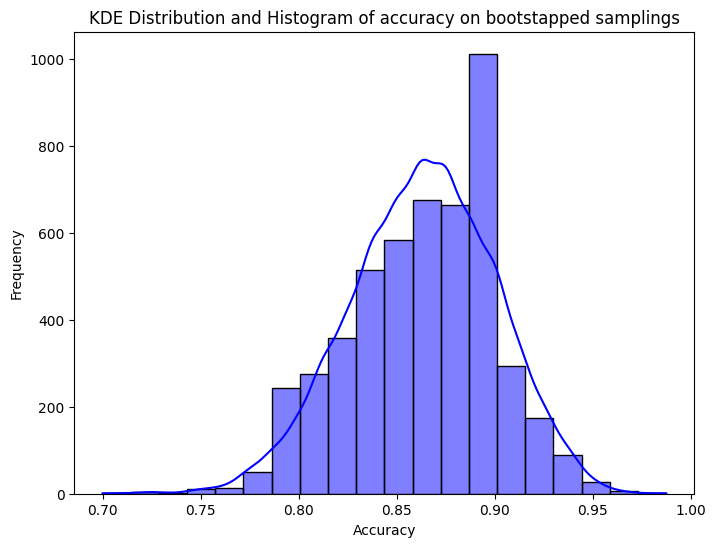

In [133]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot KDE distribution and histogram on the same plot
sns.histplot(scores, kde=True, color='blue', ax=ax, bins=20)

ax.set_title("KDE Distribution and Histogram of accuracy on bootstapped samplings")
ax.set_xlabel("Accuracy")
ax.set_ylabel("Frequency")

plt.show()

In [134]:
arr=np.array(scores,dtype=float)
mean,std=np.mean(arr),np.std(arr)
print(f"Mean accuracy={mean}\nStandard Deviation={std}")

Mean accuracy=0.8631599999999998
Standard Deviation=0.036901922714135095


[Text(0.4305555555555556, 0.9444444444444444, 'x[230] <= 160.969\ngini = 0.498\nsamples = 199\nvalue = [170, 148]'),
 Text(0.2222222222222222, 0.8333333333333334, 'x[1578] <= 0.358\ngini = 0.092\nsamples = 74\nvalue = [118, 6]'),
 Text(0.1111111111111111, 0.7222222222222222, 'x[750] <= 147.164\ngini = 0.444\nsamples = 5\nvalue = [2, 4]'),
 Text(0.05555555555555555, 0.6111111111111112, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.16666666666666666, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.7222222222222222, 'x[474] <= 0.005\ngini = 0.033\nsamples = 69\nvalue = [116, 2]'),
 Text(0.2777777777777778, 0.6111111111111112, 'x[587] <= 0.968\ngini = 0.017\nsamples = 68\nvalue = [116, 1]'),
 Text(0.2222222222222222, 0.5, 'gini = 0.0\nsamples = 67\nvalue = [116, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3888888888888889, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.63

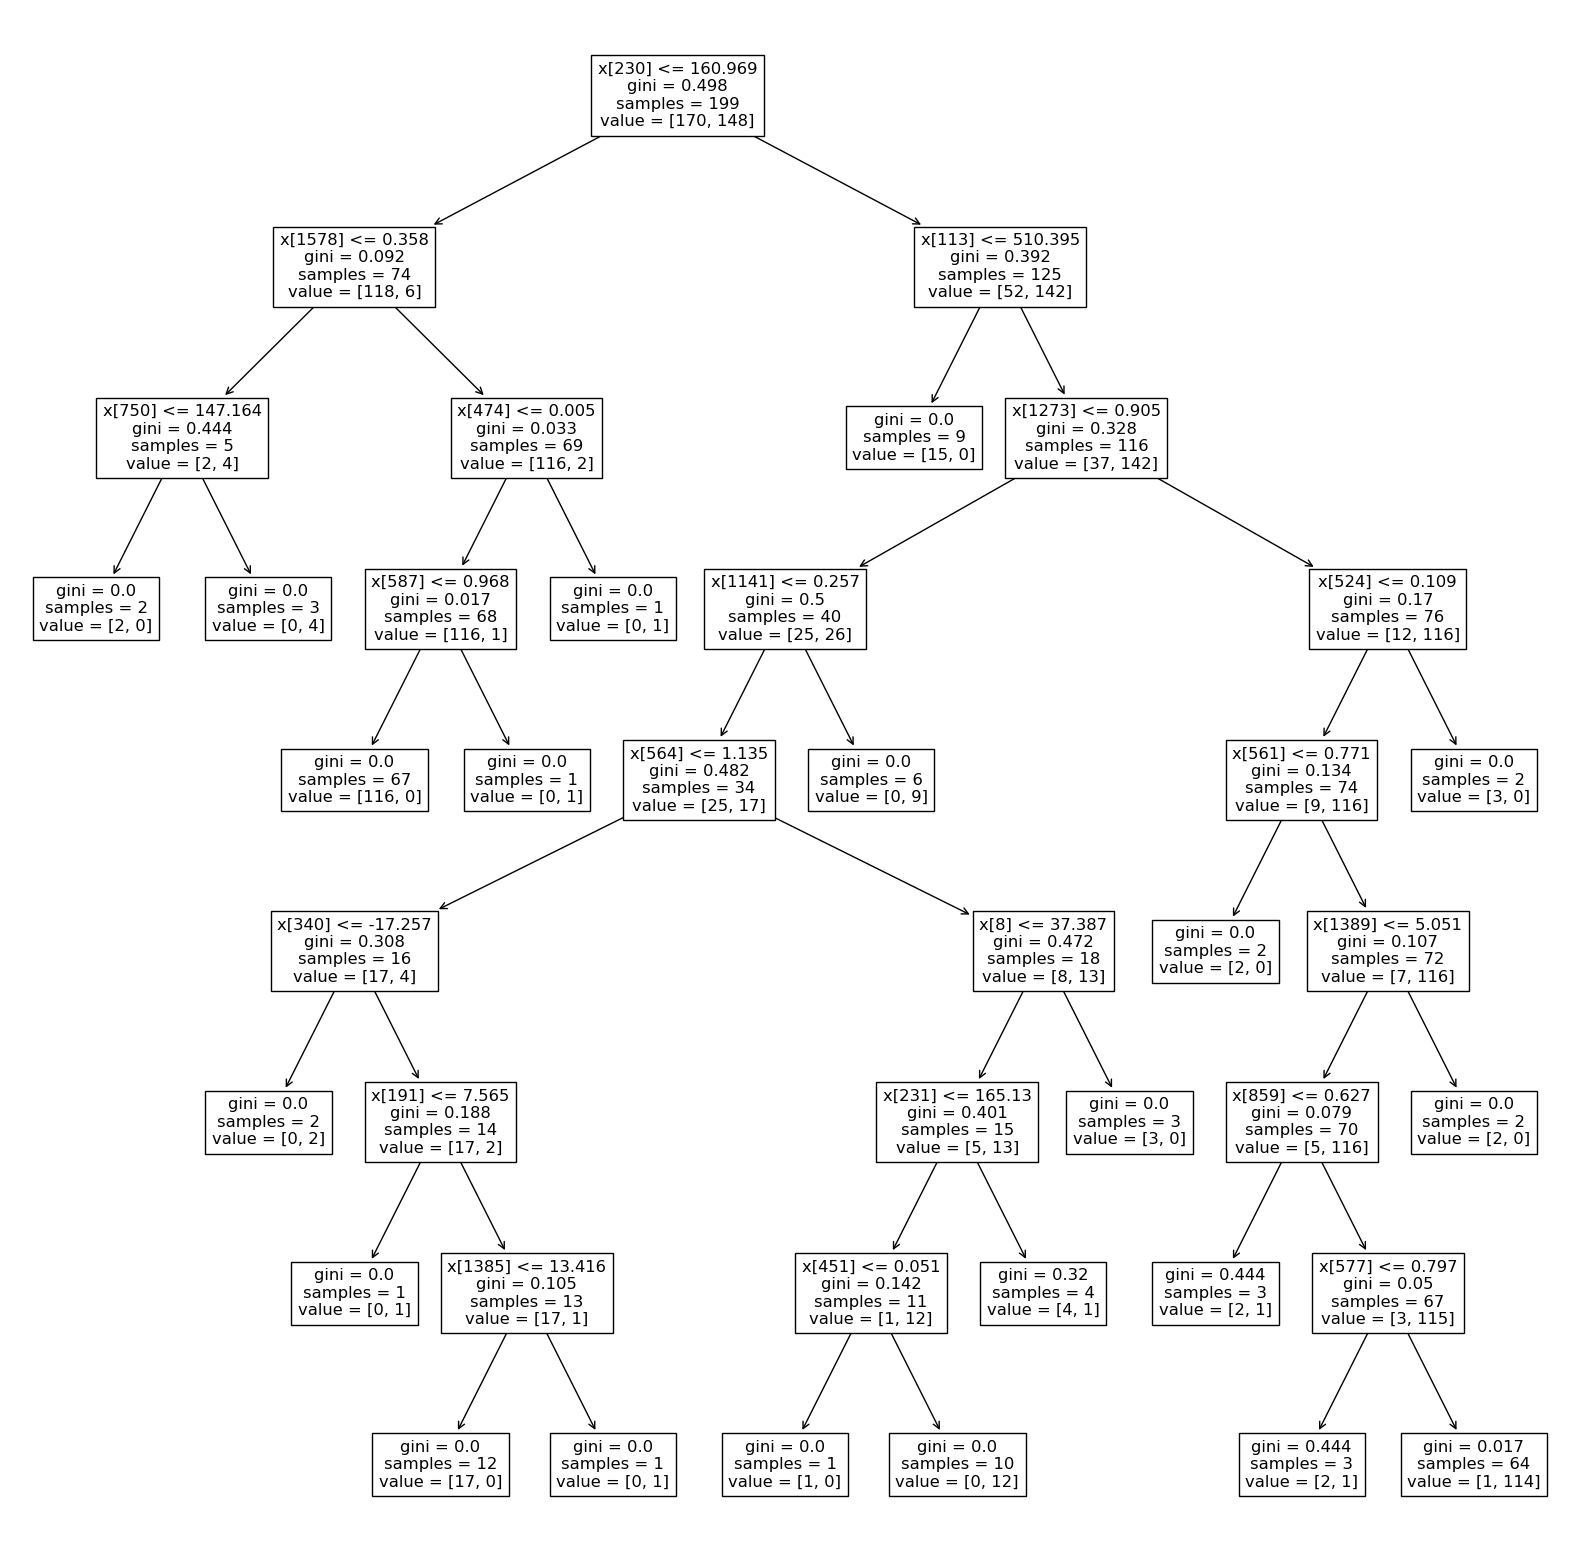

In [141]:
fig, ax = plt.subplots(figsize=(20, 20))


from sklearn import tree
tree.plot_tree(clf.estimators_[0],ax=ax)